In [5]:
# all imports
%matplotlib inline
import sys

import cvxopt
from cvxopt import solvers,matrix

# THESE ARE FORM THE DATA SOUCE
from prep_terrain_data import makeTerrainData

import copy

import pylab as pl

# from numpy
from numpy import log
import numpy as np
from numpy.linalg import inv
from numpy.linalg import det

# from scipy
import scipy as sc

# from sklearn
import sklearn
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets, linear_model
from sklearn.cross_validation import KFold    
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split #  this is used for cross validation 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import linear_model
#SUPPORT VECTOR MACHINES
from sklearn import svm

# THIS IS FOR THE DISPLAY
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

# from pandas
import pandas as pd

#from matplot
import matplotlib.pyplot as plt
import matplotlib 

# regular python imports
import math

from math import exp
import collections # this is used to perform the collection  based sorting  and unique element identification
from functools import partial # this is to accomdate partials
import random
import os
import re

non seperable data plot:
features_train (750L, 2L)
labels_train (750L,)


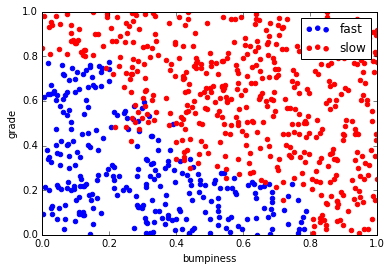

(100L, 2L)
(100L,)


In [6]:
'''
Question 1> create a seperable and non seperable data set
this is to create a non seperable data set
'''
print "non seperable data plot:"
features_train, labels_train, features_test, labels_test = makeTerrainData()

grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

print "features_train" ,np.array(features_train).shape
print "labels_train",   np.array(labels_train).shape

#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

'''
 viewing the seperable data plot
  here you are uing the iris data set to create a seperable dataset
'''
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:100,:2] 
Y = iris.target[:100]

# class1Index = np.where(Y==0)
# class2Index = np.where(Y==1)
# plt.scatter(X[class1Index], Y[class1Index], color = "b", label="class 1")
# plt.scatter(X[class2Index], Y[class2Index], color = "r", label="class 2")
# plt.legend()
# plt.xlabel("class 1")
# plt.ylabel("class 2")
# plt.show()

print X.shape
print Y.shape

In [7]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

########################## SVM #################################
# print "features trainied",labels_train
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)


from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)

print "acc",acc
def submitAccuracy():
    return acc

acc 0.92


In [14]:
'''
Here  you are expecting  the  y ,alpha g, h  are coloumn vector
'''
class SVmImpl:
    '''
    notes: here you n   
    '''
    def get_solution(Q, p, G, h, A, b):
        # 
        return solvers.qp(Q, p, G, h, A, b)
    
    def get_Q (self,M):
        temp = np.ones((M,1))*-1
#         temp =  temp.astype(np.float)
        print"Q",temp.shape
#         temp = [a in a for a in temp]
        return cvxopt.matrix(temp)
    
    def get_p (self,X,Y):
        temp = np.dot(Y,Y.T)*np.dot(X,X.T)
#         temp =  temp.astype(np.float)
        print"p",temp.shape
#         cvxopt.matrix([a for a in temp])
#         temp = [a in a for a in temp]
        return cvxopt.matrix(temp)
    
    def get_G (self,M):
        ## for now taking G as M x N matrix 
        temp = np.ones((M,M))*-1
#         temp =  temp.astype(np.float)
        print"G",temp.shape
#         temp = [a in a for a in temp]
        return cvxopt.matrix(temp)
        
    
    def get_h (self,M):
        temp = np.zeros((M,1))
#         temp =  temp.astype(np.float)
        #cvxopt.matrix([a for a in temp])
        print"h",temp.shape
#         temp = [a in a for a in temp]
        return cvxopt.matrix(temp)
        

    def get_A  (self,y):
        temp = y.T
        temp =  temp.astype(np.float)
        print"A",temp.shape
#         temp = [a in a for a in temp]
        return cvxopt.matrix(temp,tc='d')
    
    def get_b (self):
        resultVal = 0.0
        return matrix(resultVal)
       
    def fit(self,X,Y):
        print Y
        '''
        both the x and Y should be a row vector
        '''
        M = X.shape[0]
        N = X.shape[1]
        print "Shape of X function",M,N
        print "y",Y.shape
        Q = self.get_Q(M)
        p = self.get_p(X,Y)
        G = self.get_G(M)
        h = self.get_h(M)
        A = self.get_A(Y)
        b =self.get_b()
#         print "Q",Q
#         print "p",p
#         print "G",G
#         print "h",h
#         print "A",A
#         print "b",b
        
        print"using the actual values"
#         Q = 2*matrix([ [2, .5], [.5, 1] ])
#         p = matrix([1.0, 1.0])
#         G = matrix([[-1.0,0.0],[0.0,-1.0]])
#         h = matrix([0.0,0.0])
#         A = matrix([1.0, 1.0], (1,2))
#         b = matrix(1.0)
#         print "Q",Q
#         print "p",p
#         print "G",G
#         print "h",h
#         print "A",A
#         print "b",b
#         sol=solvers.qp(Q = Q_1, p = p_1, G = G_1, h = h_1, A = A_1, b= b_1)
        sol=cvxopt.solvers.qp(p,Q, G, h,A, b)
#         print "sol",sol('')


    def predict(self):
        print "you are there in the predict function"
    
    
svmImpl = SVmImpl()
# np.array(features_train).shape
# np.array(labels_train).shape
def turntoMinusOne(givenList):
    tempList=[];
    for a in givenList:
        if a<=0:
            a = -1;
            tempList.append(a)
        else:
            tempList.append(a)
    return tempList
temyy = turntoMinusOne(labels_train)
svmImpl.fit(np.array(features_train),np.array([temyy]).T)
# svmImpl.fit(np.array(features_train),np.array([labels_train]).T)

[[-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]

ValueError: Rank(A) < p or Rank([P; A; G]) < n

In [ ]:
class TestMetrics:
    
    def setData(self,y_test,y_pred_class):
            self.y_test = y_test
            self.y_pred_class = y_pred_class
    def getMatrics(self):
        # save confusion matrix and slice into four pieces
        confusion = metrics.confusion_matrix(self.y_test, self.y_pred_class)
#       print "confusion matrix:",confusion
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        if math.isnan(TP):
            print "tp is nan"
            TP = 0
        if math.isnan(TN):
            print "tn is nan"
            TN = 0
        if math.isnan(FP):
            print "fp is nan"
            FP = 0
        if math.isnan(FN):
            print " is nan"
            FN = 0       

        #Classification Accuracy: Overall, how often is the classifier correct?
        #Classification_Accuracy = (TP + TN) / float(TP + TN + FP + FN)
        Classification_Accuracy = metrics.accuracy_score(self.y_test, self.y_pred_class)
        #print "#Classification Accuracy:\t",Classification_Accuracy
       
        #Classification Error: Overall, how often is the classifier incorrect?
        #Classification_Error = (FP + FN) / float(TP + TN + FP + FN)
        Classification_Error =  1 - metrics.accuracy_score(self.y_test, self.y_pred_class)
        
        #Sensitivity:
        Sensitivity = TP / float(TP + FN)
        #print "#Sensitivity:\t",Sensitivity

        Specificity = TN / float(TN + FP) 
        #print "#Specificity:\t",Specificity
        False_Positive_Rate = FP / float(TN + FP)
        #Precision = TP / float(TP + FP)
        Precision = metrics.precision_score(self.y_test, self.y_pred_class)
        return TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision

In [ ]:
-1*np.ones((100,1))
np.ones((np.array([1,2,3,4,5,6,1]).shape[0],1))*-1
np.array([[1,2,3,4,5,6,1]]).T

qwe = np.zeros((10,1))
print qwe
# x = np.ones((10,10))*-1
# newDia = np.diag(np.diag(x))

# print newDia
# print "test1"
# print np.concatenate((newDia, qwe), axis=0)

In [ ]:
np.ones((10,1))*-1